## Playground for an ABM prototype

In [1]:
import agent as ag
import numpy as np
import pandas as pd
# Model design
import random

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython

from dataclasses import asdict, astuple

## How agents work

Agents have three characteristics:

1. **features**, immutable variables (e.g., gender, age, etc)
2. **states**, mutable variables (e.g., employed, infected, mental health and number of contacts)
3. **actions**, functions which change the agents' status (e.g., go to work, socialise)

## How a simulation works

Every day an agent can choose an action (ideally multiple actions a day). The simulation will start from day = 0, will check the type of agents' features -> states and thus choices and will apply some lockdown policies. These policies will affect the agents' states, and therefore their availability of actions, and how these actions will impact the state at the end of the day.

We will collect the output of those states as a dataframe every day.

### Generate a population with given paramenters

We build a population of n agents with the following parameters:

In [8]:
parameters = {'n' : 50,
              'n_age_groups':4,
              'min_age':24,
              'max_age': 65,
              'age_strata': [.25, .23, .31, .21],
              'low_education': .11,
              'medium_education': .25,
              'high_education': .64,
              'employed_true': .86,
              'employed_false_seeking': .055,
              'employed_false_other': .085,
              'single': .20,
              'married': .41,
              'live_in_partner': .29,
              'in_relationship_no_cohabitation': .09,
              'other_relationship': .01,
              '%_gender':50,
              '%_depression': 20,
              '%_addiction': 5,
              '%_fatigue': 5,
              '%_burnout': 73,
              '%_child': 7,
              '%_child_inhouse': 58,
              '%_single_parent': 5,
              'finance_difficulties_false': 85,
              'finance_difficulties_many': 2,
              'finance_difficulties_some': 13,
              'health_difficulties_false': 75,
              'health_difficulties_many': 4,
              'health_difficulties_some': 20,
              'housing_difficulties_false': 79,
              'housing_difficulties_many': 3,
              'housing_difficulties_some': 18  
              
}

In [9]:
n_people = parameters['n']
gd = ag.generate_gender_distribution(n_people=n_people, percentage=parameters['%_gender'])
ad = ag.generate_age_distribution(n_people=n_people, n_age_groups=parameters['n_age_groups'], min_age=parameters['min_age'], max_age=parameters['max_age'], prob=parameters['age_strata'])
ea = ag.generate_educational_attainment_distribution(n_people = n_people, low = parameters['low_education'], medium=parameters['medium_education'], high=parameters['high_education'])
ed = ag.generate_employment_distribution(n_people = n_people, yes = parameters['employed_true'], no_seeking=parameters['employed_false_seeking'], no_other=parameters['employed_false_other'])
pd = ag.generate_partnership_statuts_distribution(n_people= n_people, single=parameters['single'], married=parameters['married'], live_in_partner=parameters['live_in_partner'], in_relationship_no_cohabitation=parameters['in_relationship_no_cohabitation'], other=parameters['other_relationship'])
dd = ag.generate_pre_existing_depression_distribution(n_people=n_people, percentage=parameters['%_depression'])
pad = ag.generate_pre_existing_addiction_distribution(n_people=n_people, percentage=parameters['%_addiction'])
pfd = ag.generate_pre_existing_fatigue_distribution(n_people=n_people, percentage=parameters['%_fatigue'])
cd = ag.generate_child_distribution(n_people=n_people, percentage=parameters['%_child'])
pbd = ag.generate_pre_existing_burnout_distribution(n_people=n_people, percentage=parameters['%_burnout'])
lcd = ag.generate_living_with_children_distribution(n_people=n_people, percentage=parameters['%_child_inhouse'])
hd = ag.generate_health_difficulties_distribution(n_people=n_people, no=parameters['health_difficulties_false'], some=parameters['health_difficulties_some'], many=parameters['health_difficulties_many'])
fd = ag.generate_finance_difficulties_distribution(n_people=n_people, no=parameters['finance_difficulties_false'], some=parameters['finance_difficulties_some'], many=parameters['finance_difficulties_many'])
spd = ag.generate_single_parent_distribution(n_people=n_people, percentage=parameters['%_single_parent'])
hdd = ag.generate_housing_difficulties_distribution(n_people=n_people, no=79, some=18, many=3)
pdd = ag.generate_partner_difficulties_distribution(n_people=n_people, no=parameters['housing_difficulties_false'], some=parameters['housing_difficulties_some'], many=parameters['housing_difficulties_many'])
people = []

for i in range(n_people):
    features = ag.Features(name = str(i),
                        gender = gd[i], 
                        age = ad[i], 
                        education = ea[i], 
                        employed = ed[i], 
                        partnership_status = pd[i], 
                        pre_existing_depression = dd[i], 
                        pre_existing_burnout = pbd[i], 
                        pre_existing_addiction = pad[i], 
                        pre_existing_chronic_fatigue = pfd[i], 
                        pre_existing_health_issues = hd[i], 
                        parenthood = cd[i], 
                        living_with_child = lcd[i], 
                        single_parent = spd[i], 
                        housing_difficulties = hdd[i], 
                        finance_difficulties = fd[i], 
                        partner_difficulties = pdd[i])
    
    state = ag.State(employed=np.random.choice(2), 
                     infected= 0, 
                     mental_health= 2,
                     n_contacts= 0)
    
    people.append(ag.Agent(features=features, state=state))
    
    

In [4]:
steps = 100

state_history = []
for step in range(steps):
    day_states = []
    for agent in people:
        
        if agent.state.employed:
            agent.go_to_work()
        
        agent.socialise()
        
        day_states.append(agent.state)
    
    state_history.append(day_states)
        
        
        

In [11]:
mh_employed = [s.mental_health for s in state_history[-1] if s.employed]
mh_unemployed = [s.mental_health for s in state_history[-1] if not(s.employed)]

In [15]:
mh_unemployed

[302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302]

In [13]:
print(np.mean(mh_employed))

print(np.mean(mh_unemployed))

402.1333333333333
302.0


In [23]:
people[0].features.attrgetter()

AttributeError: 'Features' object has no attribute 'attrgetter'

This is an example of an agent:

In [19]:
df = pd.DataFrame()



[Agent(features=Features(name='0', gender=1, age=32, education='High', employed='Yes', partnership_status='Married', pre_existing_depression=0, pre_existing_burnout=0, pre_existing_addiction=1, pre_existing_chronic_fatigue=1, parenthood=1, living_with_child=1, single_parent=1, housing_difficulties='No', finance_difficulties='No', pre_existing_health_issues='No', partner_difficulties='No'), state=State(employed=0, infected=0, mental_health=2, n_contacts=0)),
 Agent(features=Features(name='1', gender=1, age=31, education='Medium', employed='Yes', partnership_status='Married', pre_existing_depression=1, pre_existing_burnout=0, pre_existing_addiction=1, pre_existing_chronic_fatigue=1, parenthood=1, living_with_child=0, single_parent=1, housing_difficulties='No', finance_difficulties='No', pre_existing_health_issues='Many', partner_difficulties='Some'), state=State(employed=0, infected=0, mental_health=2, n_contacts=0)),
 Agent(features=Features(name='2', gender=0, age=41, education='High',

Plot distributions

In [8]:
from itertools import groupby
from operator import attrgetter

In [24]:
print(asdict(people[0].features))


{'name': '0', 'gender': 1, 'age': 32, 'education': 'High', 'employed': 'Yes', 'partnership_status': 'Married', 'pre_existing_depression': 0, 'pre_existing_burnout': 0, 'pre_existing_addiction': 1, 'pre_existing_chronic_fatigue': 1, 'parenthood': 1, 'living_with_child': 1, 'single_parent': 1, 'housing_difficulties': 'No', 'finance_difficulties': 'No', 'pre_existing_health_issues': 'No', 'partner_difficulties': 'No'}


In [29]:
def make_features_df(agent_list):
    '''
    Takes a list of agents, return pandas dataframe of features
    '''
    df = []

    for p in agent_list:
        df.append(asdict(p.features))

    df = pd.DataFrame.from_dict(df)
    
    return df

In [30]:
make_features_df(people)

,name,gender,age,education,employed,partnership_status,pre_existing_depression,pre_existing_burnout,pre_existing_addiction,pre_existing_chronic_fatigue,parenthood,living_with_child,single_parent,housing_difficulties,finance_difficulties,pre_existing_health_issues,partner_difficulties
0,0,1,32,High,Yes,Married,0,0,1,1,1,1,1,No,No,No,No
1,1,1,31,Medium,Yes,Married,1,0,1,1,1,0,1,No,No,Many,Some
2,2,0,41,High,Yes,Live-in partner,1,1,1,1,1,1,1,No,No,No,No
3,3,0,62,High,Yes,"In relationship, no cohabitation",0,1,1,1,1,1,1,Some,No,No,No
4,4,0,63,Medium,Yes,Live-in partner,0,0,1,1,1,1,1,No,No,No,No
5,5,1,46,High,Yes,Married,1,0,1,1,1,0,1,No,No,No,No
6,6,0,64,Medium,"No, seeking employment",Live-in partner,1,0,1,1,1,1,1,No,Some,No,No
7,7,0,29,Low,Yes,Married,1,0,1,1,1,1,1,No,Some,Some,No
8,8,0,24,High,Yes,Live-in partner,1,0,1,1,1,1,1,No,No,No,No
9,9,1,39,High,"No, seeking employment",Married,1,0,1,1,1,1,1,No,No,No,No


<AxesSubplot: ylabel='Count'>

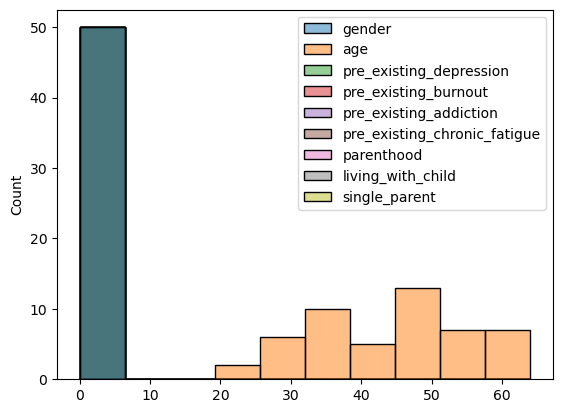

In [28]:
sns.histplot(data=df)

In [ ]:
ad = 
plt.hist(ad)

In [ ]:
@dataclass
class Lockdown():
    ''' Represents the type of lockdown'''
    __slots__ = ['name', 'frequency', 'length', 'severity']
    
    name: str
    frequency: float
    start: float
    end: float
    severity: int    

In [6]:
person.age

18

In [53]:

class Agent():
    ''' Represents an agent in our small world '''
    
    def __init__(self, condition, age, mental_state):
        ''' Initialisation '''
        self.condition = condition
        self.age = age
        self.mental_state = mental_state    
   
    def becoming_positive(self):
        ''' Agent has tested positive '''
        self.condition = 1
        self.mental_state =+ np.random.rand()
    
    def working_from_home(self):
        ''' Agent is working from home '''
        self.mental_state =+ np.random.rand()
    
   
class Simulation():
    def __init__(self,n_people,n_steps,p):
        conditions = np.random.randint(2,size=n_people)
        ages = np.random.choice(np.arange(18,60),size=n_people)
        mental_states = np.random.randint(2,size=n_people)
        
        self.agents = []
        for i in range(n_people):
            self.agents.append(Agent(condition=0,#conditions[i],
                                     age=ages[i],
                                     mental_state=mental_states[i]))
        self.n_steps = n_steps
        self.n_people = n_people
        self.p = p
        
    def update(self,p):
        infected = np.random.choice(np.arange(self.n_people),size=int(p*self.n_people))
        for i in infected:
            self.agents[i].becoming_positive()
            
    def monitor_mh_average(self):
        mh = [i.mental_state for i in self.agents]
        
        return np.mean(mh)
        
        
    def run(self):
        avg_mh = np.zeros(self.n_steps)
        for step in range(self.n_steps):
            self.update(self.p)
            avg_mh[step] = self.monitor_mh_average()
            
        return avg_mh
            
            
        
            
    
    
        
        
        


In [56]:
model = Simulation(n_people=1000,
                   n_steps=50,
                   p=0.1)

mh = model.run()

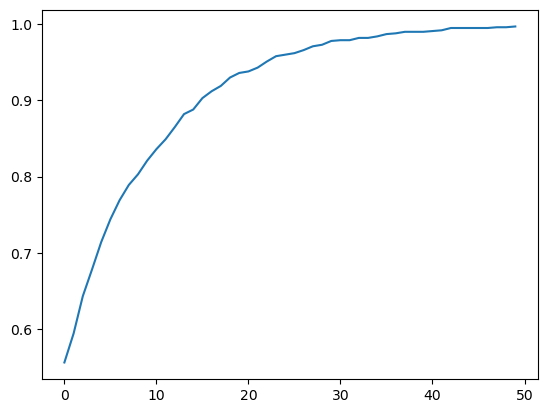

In [57]:
plt.plot(mh)

In [24]:
class VirusModel(ap.Model):

    def setup(self):
        """ Initialize the agents and network of the model. """

        # Prepare a small-world network
        graph = nx.watts_strogatz_graph(
            self.p.population,
            self.p.number_of_neighbors,
            self.p.network_randomness)

        # Create agents and network
        self.agents = ap.AgentList(self, self.p.population, Person)
        self.network = self.agents.network = ap.Network(self, graph)
        self.network.add_agents(self.agents, self.network.nodes)

        # Infect a random share of the population
        I0 = int(self.p.initial_infection_share * self.p.population)
        self.agents.random(I0).condition = 1

    def update(self):
        """ Record variables after setup and each step. """

        # Record share of agents with each condition
        for i, c in enumerate(('S', 'I', 'R')):
            n_agents = len(self.agents.select(self.agents.condition == i))
            self[c] = n_agents / self.p.population
            self.record(c)

        # Stop simulation if disease is gone
        if self.I == 0:
            self.stop()

    def step(self):
        """ Define the models' events per simulation step. """

        # Call 'being_sick' for infected agents
        self.agents.select(self.agents.condition == 1).being_sick()

    def end(self):
        """ Record evaluation measures at the end of the simulation. """

        # Record final evaluation measures
        self.report('Total share infected', self.I + self.R)
        self.report('Peak share infected', max(self.log['I']))

Init signature: ap.Model(parameters=None, _run_id=None, **kwargs)
Docstring:     
Template of an agent-based model.

Arguments:
    parameters (dict, optional):
        Dictionary of the model's parameters.
        Default values will be selected from entries of type
        :class:`Range`, :class:`IntRange`, and :class:`Values`.
        The following parameters will be used automatically:

        - steps (int, optional):
          Defines the maximum number of time-steps.
          If none is passed, there will be no step limit.
        - seed (int, optional):
          Used to initiate the model's random number generators.
          If none is passed, a random seed will be generated.
        - report_seed (bool, optional):
          Whether to document the random seed used (default True).

    **kwargs: Will be forwarded to :func:`Model.setup`.

Attributes:
    type (str): The model's class name.
    info (InfoStr): Information about the model's current state.
    p (AttrDict): The 